In [106]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import preprocessor as p

In [107]:
df = pd.read_csv('./Biden_No_Retweet_Full_Text_After_Election.csv')
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets
0,2022-05-08 23:58:20+00:00,1523452270448635905,False,The fact that #BethSentUs doxxed the justices ...,SanFranSooner,NaN,Twitter for iPhone,3,285,561,2
1,2022-05-08 23:57:33+00:00,1523452076147179520,False,Trump complained US Navy ships ‘look ugly’: Es...,MartinJmcmah,NaN,Twitter for iPhone,2,1213,179,0
2,2022-05-08 23:56:51+00:00,1523451899659251712,False,Remember when #biden left Afghanistan? Why isn...,christjiminy1,NaN,Twitter for iPhone,0,8,67,0
3,2022-05-08 23:55:50+00:00,1523451642909061121,False,"#Biden is asking for a $813,000,000,000 ""defen...",joshuamills044,NaN,Twitter for Android,0,662,1089,0
4,2022-05-08 23:53:44+00:00,1523451115479924741,False,"@ArseGrammatica Last month, the #SCOTUS reject...",hollmic,"Kansas, USA",Twitter Web App,0,89,427,0
...,...,...,...,...,...,...,...,...,...,...,...
13653,2022-04-29 22:47:06+00:00,1520172853454323712,False,Voldemort is back!\n\n** This post has been fl...,2DIEisGAIN82,NaN,Twitter for iPhone,0,75,291,0
13654,2022-04-29 22:46:23+00:00,1520172674709954560,False,#Biden will have to either #boycott #G20Indone...,besthealthyou,Planet Earth,Twitter Web App,0,427,62,0
13655,2022-04-29 22:44:43+00:00,1520172254700703744,False,Ex-#Biden aide Francis Person went to White Ho...,livlifealliance,The Beautiful USA,Twitter for Android,0,17,140,0
13656,2022-04-29 22:44:39+00:00,1520172237562728448,False,@GOP:\nDid #Biden compromise national security...,ttstrac,America,Twitter for iPhone,0,5130,5504,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13658 entries, 0 to 13657
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       13658 non-null  object
 1   Tweet_id   13658 non-null  int64 
 2   Verified   13658 non-null  bool  
 3   Tweet      13658 non-null  object
 4   User       13658 non-null  object
 5   Location   9021 non-null   object
 6   Source     13658 non-null  object
 7   Likes      13658 non-null  int64 
 8   Followers  13658 non-null  int64 
 9   Following  13658 non-null  int64 
 10  Retweets   13658 non-null  int64 
dtypes: bool(1), int64(5), object(5)
memory usage: 1.1+ MB


In [109]:
df.shape

(13658, 11)

In [110]:
df['Date'] = df['Date'].apply(lambda x: x[:-6] if '+' in x else x)
df.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets
0,2022-05-08 23:58:20,1523452270448635905,False,The fact that #BethSentUs doxxed the justices ...,SanFranSooner,NaN,Twitter for iPhone,3,285,561,2
1,2022-05-08 23:57:33,1523452076147179520,False,Trump complained US Navy ships ‘look ugly’: Es...,MartinJmcmah,NaN,Twitter for iPhone,2,1213,179,0
2,2022-05-08 23:56:51,1523451899659251712,False,Remember when #biden left Afghanistan? Why isn...,christjiminy1,NaN,Twitter for iPhone,0,8,67,0
3,2022-05-08 23:55:50,1523451642909061121,False,"#Biden is asking for a $813,000,000,000 ""defen...",joshuamills044,NaN,Twitter for Android,0,662,1089,0
4,2022-05-08 23:53:44,1523451115479924741,False,"@ArseGrammatica Last month, the #SCOTUS reject...",hollmic,"Kansas, USA",Twitter Web App,0,89,427,0


In [111]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [112]:
min(df['Date'])

Timestamp('2022-04-29 22:42:58')

In [113]:
max(df['Date'])

Timestamp('2022-05-08 23:58:20')

In [114]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [115]:
df.isnull().sum()

Date            0
Tweet_id        0
Verified        0
Tweet           0
User            0
Location     4637
Source          0
Likes           0
Followers       0
Following       0
Retweets        0
dtype: int64

In [116]:
df["Source"].value_counts()

Source
Twitter Web App        4930
Twitter for iPhone     3811
Twitter for Android    2896
Twitter for iPad        517
Valurank                354
                       ... 
eClincher                 1
Infokalyptisch            1
The Tweeted Times         1
SocialChamp IO            1
Bot Sentinel              1
Name: count, Length: 119, dtype: int64

In [117]:
df['Location'].nunique()

2490

In [118]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

13658

In [119]:
unique_tweets_list = set(tweets_list)
len(unique_tweets_list)

13525

In [120]:
unique_tweets_list  = list(unique_tweets_list)
type(unique_tweets_list)

list

In [121]:
df['Tweet'].duplicated().sum()

133

In [122]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(13525, 11)

In [123]:
df['Tweet'].duplicated().sum()

0

In [124]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet'] = df["Tweet"].apply(remove_emoji)

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/1418489379.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = df["Tweet"].apply(remove_emoji)


In [125]:
# Deleting ReTweet rows
count = 0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [126]:
df['Processed_Tweet']

0        The fact that #BethSentUs doxxed the justices ...
1        Trump complained US Navy ships ‘look ugly’: Es...
2        Remember when #biden left Afghanistan? Why isn...
3        #Biden is asking for a $813,000,000,000 "defen...
4        @ArseGrammatica Last month, the #SCOTUS reject...
                               ...                        
13520    Voldemort is back!\n\n** This post has been fl...
13521    #Biden will have to either #boycott #G20Indone...
13522    Ex-#Biden aide Francis Person went to White Ho...
13523    @GOP:\nDid #Biden compromise national security...
13524    @CBSMornings Only fools do not believe in the ...
Name: Processed_Tweet, Length: 13525, dtype: object

In [127]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/1438788522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring


In [128]:
df["Processed_Tweet"]

0        The fact that #BethSentUs doxxed the justices ...
1        Trump complained US Navy ships ‘look ugly’: Es...
2        Remember when #biden left Afghanistan? Why isn...
3        #Biden is asking for a $813,000,000,000 "defen...
4        @ArseGrammatica Last month, the #SCOTUS reject...
                               ...                        
13520    Voldemort is back!\n\n** This post has been fl...
13521    #Biden will have to either #boycott #G20Indone...
13522    Ex-#Biden aide Francis Person went to White Ho...
13523    @GOP:\nDid #Biden compromise national security...
13524    @CBSMornings Only fools do not believe in the ...
Name: Processed_Tweet, Length: 13525, dtype: object

In [129]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/199548066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames


0        The fact that #BethSentUs doxxed the justices ...
1        Trump complained US Navy ships ‘look ugly’: Es...
2        Remember when #biden left Afghanistan? Why isn...
3        #Biden is asking for a $813,000,000,000 "defen...
4          Last month, the #SCOTUS rejected the #Biden ...
                               ...                        
13520    Voldemort is back!\n\n** This post has been fl...
13521    #Biden will have to either #boycott #G20Indone...
13522    Ex-#Biden aide Francis Person went to White Ho...
13523     \nDid #Biden compromise national security by ...
13524      Only fools do not believe in the possibility...
Name: Processed_Tweet, Length: 13525, dtype: object

In [130]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/2004849690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls


0        The fact that #BethSentUs doxxed the justices ...
1        Trump complained US Navy ships ‘look ugly’: Es...
2        Remember when #biden left Afghanistan? Why isn...
3        #Biden is asking for a $813,000,000,000 "defen...
4          Last month, the #SCOTUS rejected the #Biden ...
                               ...                        
13520    Voldemort is back!\n\n** This post has been fl...
13521    #Biden will have to either #boycott #G20Indone...
13522    Ex-#Biden aide Francis Person went to White Ho...
13523     \nDid #Biden compromise national security by ...
13524      Only fools do not believe in the possibility...
Name: Processed_Tweet, Length: 13525, dtype: object

In [131]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/806794390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag


0        The fact that BethSentUs doxxed the justices w...
1        Trump complained US Navy ships ‘look ugly’: Es...
2        Remember when biden left Afghanistan? Why isn’...
3        Biden is asking for a $813,000,000,000 "defens...
4          Last month, the SCOTUS rejected the Biden  a...
                               ...                        
13520    Voldemort is back!\n\n** This post has been fl...
13521    Biden will have to either boycott G20Indonesia...
13522    Ex-Biden aide Francis Person went to White Hou...
13523     \nDid Biden compromise national security by g...
13524      Only fools do not believe in the possibility...
Name: Processed_Tweet, Length: 13525, dtype: object

In [132]:
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/3368534414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]


0        The fact that BethSentUs doxxed the justices w...
1        Trump complained US Navy ships look ugly: Espe...
2        Remember when biden left Afghanistan? Why isnt...
3        Biden is asking for a $813,000,000,000 "defens...
4        Last month, the SCOTUS rejected the Biden admi...
                               ...                        
13520    Voldemort is back!** This post has been flagge...
13521    Biden will have to either boycott G20Indonesia...
13522    Ex-Biden aide Francis Person went to White Hou...
13523    Did Biden compromise national security by gree...
13524    Only fools do not believe in the possibility o...
Name: Processed_Tweet, Length: 13525, dtype: object

In [133]:
#removing unnecessary special characters, numbers, punctuations in tweets
df["Processed_Tweet"] = df["Processed_Tweet"].str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/4249230652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Processed_Tweet"] = df["Processed_Tweet"].str.replace("[^a-zA-Z]", " ")


0        The fact that BethSentUs doxxed the justices w...
1        Trump complained US Navy ships look ugly: Espe...
2        Remember when biden left Afghanistan? Why isnt...
3        Biden is asking for a $813,000,000,000 "defens...
4        Last month, the SCOTUS rejected the Biden admi...
                               ...                        
13520    Voldemort is back!** This post has been flagge...
13521    Biden will have to either boycott G20Indonesia...
13522    Ex-Biden aide Francis Person went to White Hou...
13523    Did Biden compromise national security by gree...
13524    Only fools do not believe in the possibility o...
Name: Processed_Tweet, Length: 13525, dtype: object

In [134]:
df["Processed_Tweet"] = [low.lower() for low in df["Processed_Tweet"]] #Converting into lower case 
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/98036649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Processed_Tweet"] = [low.lower() for low in df["Processed_Tweet"]] #Converting into lower case


0        the fact that bethsentus doxxed the justices w...
1        trump complained us navy ships look ugly: espe...
2        remember when biden left afghanistan? why isnt...
3        biden is asking for a $813,000,000,000 "defens...
4        last month, the scotus rejected the biden admi...
                               ...                        
13520    voldemort is back!** this post has been flagge...
13521    biden will have to either boycott g20indonesia...
13522    ex-biden aide francis person went to white hou...
13523    did biden compromise national security by gree...
13524    only fools do not believe in the possibility o...
Name: Processed_Tweet, Length: 13525, dtype: object

In [135]:
df["Processed_Tweet"] =  df["Processed_Tweet"].str.replace("amp", "")
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/3668848714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Processed_Tweet"] =  df["Processed_Tweet"].str.replace("amp", "")


0        the fact that bethsentus doxxed the justices w...
1        trump complained us navy ships look ugly: espe...
2        remember when biden left afghanistan? why isnt...
3        biden is asking for a $813,000,000,000 "defens...
4        last month, the scotus rejected the biden admi...
                               ...                        
13520    voldemort is back!** this post has been flagge...
13521    biden will have to either boycott g20indonesia...
13522    ex-biden aide francis person went to white hou...
13523    did biden compromise national security by gree...
13524    only fools do not believe in the possibility o...
Name: Processed_Tweet, Length: 13525, dtype: object

In [136]:
df['Processed_Tweet'][12] 

'blame biden fauci for childrens mentalhealth masksisolation in homes, mins nbc'

Exploratory data analysis

In [137]:
df['User'].value_counts()

User
valurank           354
kk131066           197
AdorateJesus       125
RethinkingEve      105
dreyfus_michael     89
                  ... 
hamid43542842        1
TryNPuma             1
Conscie_             1
ChukwumaOdelugo      1
ttstrac              1
Name: count, Length: 6182, dtype: int64

In [138]:
df.query('User == "valurank"')["Processed_Tweet"].tolist()

["content analysis:this article scores /100. the complete report can be viewed here: (i'm a bot)president biden",
 "content analysis:this article scores /100. the complete report can be viewed here: (i'm a bot)biden centern",
 "content analysis:this article scores /100. the complete report can be viewed here: (i'm a bot)biden strategie",
 "content analysis:this article scores /100. the complete report can be viewed here: (i'm a bot)ukraine biden",
 "content analysis:this article scores /100. the complete report can be viewed here: (i'm a bot)ukraine biden",
 "content analysis:this article scores /100. the complete report can be viewed here: (i'm a bot)2000mules clinton russia biden",
 "content analysis:this article scores /100. the complete report can be viewed here: (i'm a bot)president biden",
 "content analysis:this article scores /100. the complete report can be viewed here: (i'm a bot)president biden",
 "content analysis:this article scores /100. the complete report can be viewed 

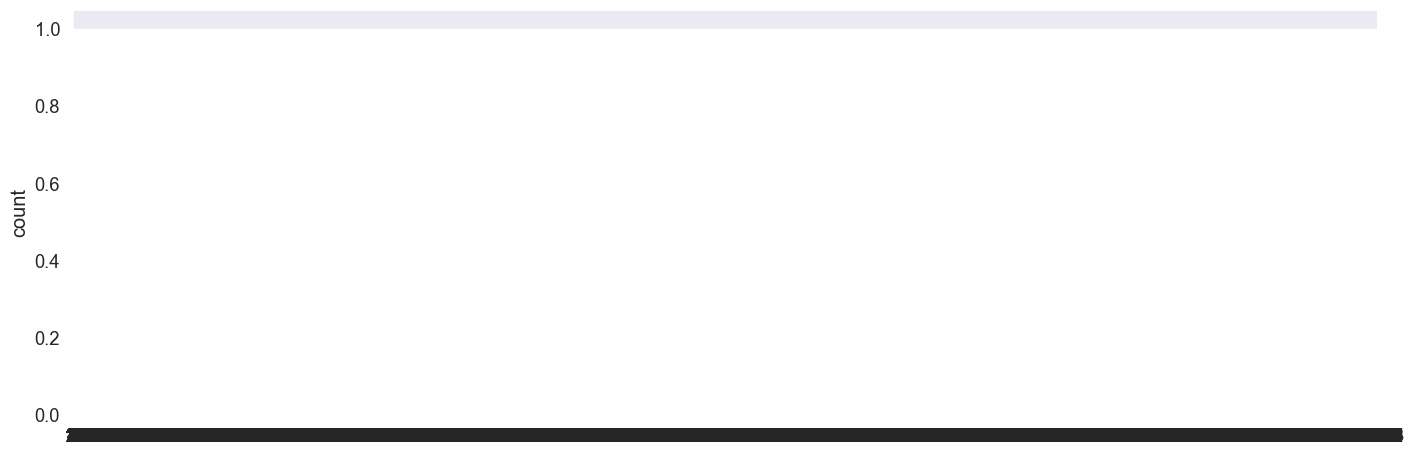

In [139]:
bar = sns.countplot(df['Verified'])

In [140]:
df['Verified'].value_counts()

Verified
False    13193
True       332
Name: count, dtype: int64

In [141]:
df_verified = df.query('Verified == True')

In [142]:
df_verified['User'].value_counts()

User
DevonHeinen        33
DickMorrisTweet     8
BastianBrauns       8
arabnews            7
natlawreview        7
                   ..
matisaksk           1
mrglenn             1
CGTNGraphics        1
khaleejtimes        1
ATParasiliti        1
Name: count, Length: 164, dtype: int64

In [143]:
df_verified.query('User == "BastianBrauns"')["Processed_Tweet"].tolist()

['but so why then is she still there? biden whcd correspondentsdinner',
 'biden to trevornoah: "now you gonna roast the president of the united states. and unlike in moscow you won\'t go to jail!" biden whcd correspondentsdinner',
 'last sentence honoring albright: "by the way madeleine albright was right. we are the indispensable nation."biden whcd correspondentsdinner',
 '"republicans seem to support one fellow. some guy named brandon. he\'s having a really good year. and i\'m kind of happy for him." letsgobrandon biden whcd correspondentsdinner',
 '"i told my grandkids and they could stay up late and watch this show tonight" biden whcd correspondentsdinner',
 'theres nothing i can say about the gop that kevin mccarthy hasnt already put on tape. biden whcd correspondentsdinner',
 '"just contact your favorite fox news reporter. vaccinated and boosted, all of them" biden whcd correspondentsdinner',
 'biden first take against trump at correspondentsdinner: "this is the first time a pres

In [144]:
days = df['Date'].dt.day.tolist()

In [145]:
no_of_days = Counter(days)
no_of_days

Counter({2: 1700,
         4: 1684,
         1: 1651,
         5: 1625,
         6: 1526,
         30: 1447,
         3: 1371,
         7: 1273,
         8: 1160,
         29: 88})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

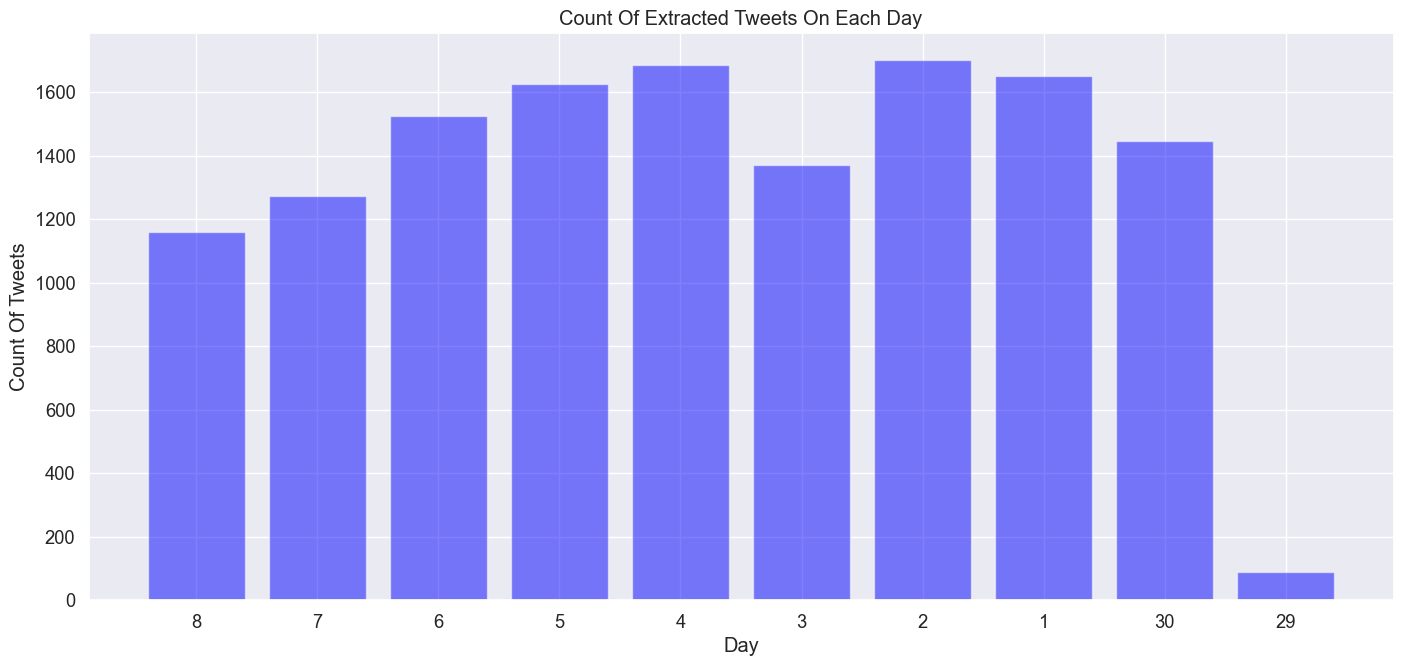

In [146]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'blue')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [147]:
hours = df['Date'].dt.hour.tolist()

In [148]:
no_of_hours = Counter(hours)
no_of_hours

Counter({15: 853,
         19: 775,
         23: 764,
         13: 761,
         16: 756,
         14: 747,
         20: 694,
         17: 694,
         18: 689,
         21: 656,
         12: 634,
         22: 610,
         0: 606,
         2: 546,
         1: 526,
         11: 521,
         3: 470,
         4: 404,
         10: 333,
         5: 316,
         9: 312,
         7: 299,
         6: 292,
         8: 267})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

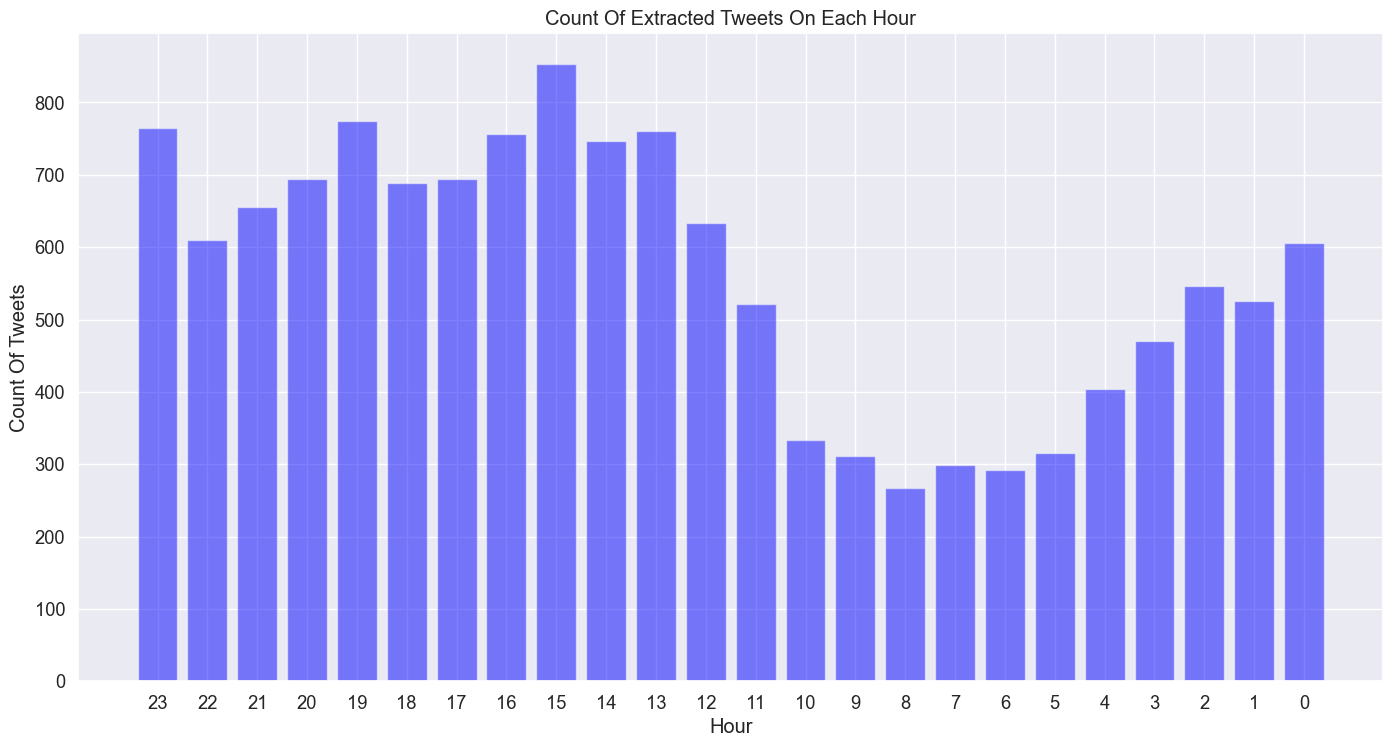

In [149]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'blue')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [150]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [151]:
#removing stopwords
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)
df['Processed_Tweet'] = df["Processed_Tweet"].apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df["Processed_Tweet"]

['doing', "needn't", 'we', 'be', 'were', 'o', 'being', 'didn', 'other', 'too', 'will', 'on', "she's", 'this', 'until', 'your', 'down', 'out', 'once', 'off', 'further', 'is', "should've", 'haven', 'these', 'after', 'a', 'while', 'between', 'm', 'for', 's', 'herself', 'mustn', 'weren', 'does', 'how', 'them', 'been', 'through', 'can', "mustn't", 'ours', 'but', 'there', 'had', 'few', 'above', 'am', 'don', 'wasn', 'hers', 'below', 'they', 'aren', 'hasn', 'each', 'just', 'shouldn', 'you', 'himself', 'did', 'with', 'his', 'ain', 'into', 'because', 'some', 'its', 'it', 'at', 'she', 'up', 'd', 'y', "haven't", "won't", 'of', 'her', 'as', 'such', "hasn't", 'their', 'if', 'hadn', 'to', 'under', "couldn't", 'not', "you're", 'll', "shouldn't", 'our', 'has', 'by', 'won', 'only', 'mightn', 'yourselves', "that'll", 'over', 'no', "mightn't", 'theirs', 'having', "you'll", 'more', 'i', "it's", 'was', 'those', 'doesn', 'ma', 'do', 'the', 'in', "you've", 'or', 'are', 'ourselves', 'very', 'now', 'what', 'an'

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/3595918028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = df["Processed_Tweet"].apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords


0        fact bethsentus doxxed justices bad enough. bi...
1        trump complained us navy ships look ugly: espe...
2        remember biden left afghanistan? isnt bigger d...
3        biden asking $813,000,000,000 "defense" budget...
4        last month, scotus rejected biden administrati...
                               ...                        
13520    voldemort back!** post flagged misinformation ...
13521    biden either boycott g20indonesia maybe zoom v...
13522    ex-biden aide francis person went white house ...
13523    biden compromise national security green light...
13524    fools believe possibility nuclear war ukrainew...
Name: Processed_Tweet, Length: 13525, dtype: object

tokenizing

In [152]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/663243142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))


0        [fact, bethsentus, doxxed, justices, bad, enou...
1        [trump, complained, us, navy, ships, look, ugl...
2        [remember, biden, left, afghanistan, ?, isnt, ...
3        [biden, asking, $, 813,000, ,, 000,000, ", def...
4        [last, month, ,, scotus, rejected, biden, admi...
                               ...                        
13520    [voldemort, back, !, *, *, post, flagged, misi...
13521    [biden, either, boycott, g20indonesia, maybe, ...
13522    [ex-biden, aide, francis, person, went, white,...
13523    [biden, compromise, national, security, green,...
13524    [fools, believe, possibility, nuclear, war, uk...
Name: Processed_Tweet, Length: 13525, dtype: object

In [153]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)

In [154]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/3241840926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming


0        [fact, bethsentu, dox, justic, bad, enough, .,...
1        [trump, complain, us, navi, ship, look, ugli, ...
2        [rememb, biden, left, afghanistan, ?, isnt, bi...
3        [biden, ask, $, 813,000, ,, 000,000, ", defens...
4        [last, month, ,, scotu, reject, biden, adminis...
                               ...                        
13520    [voldemort, back, !, *, *, post, flag, misinfo...
13521    [biden, either, boycott, g20indonesia, mayb, z...
13522    [ex-biden, aid, franci, person, went, white, h...
13523    [biden, compromis, nation, secur, green, light...
13524    [fool, believ, possibl, nuclear, war, ukrainew...
Name: Processed_Tweet, Length: 13525, dtype: object

In [155]:
df["Processed_Tweet"] = df["Processed_Tweet"].apply(lambda x: [i for i in x if len(i)>2])
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/398027368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Processed_Tweet"] = df["Processed_Tweet"].apply(lambda x: [i for i in x if len(i)>2])


0        [fact, bethsentu, dox, justic, bad, enough, bi...
1        [trump, complain, navi, ship, look, ugli, espe...
2        [rememb, biden, left, afghanistan, isnt, bigge...
3        [biden, ask, 813,000, 000,000, defens, budget,...
4        [last, month, scotu, reject, biden, administra...
                               ...                        
13520    [voldemort, back, post, flag, misinform, biden...
13521    [biden, either, boycott, g20indonesia, mayb, z...
13522    [ex-biden, aid, franci, person, went, white, h...
13523    [biden, compromis, nation, secur, green, light...
13524    [fool, believ, possibl, nuclear, war, ukrainew...
Name: Processed_Tweet, Length: 13525, dtype: object

In [156]:
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2022-05-08 23:58:20,1523452270448635905,False,The fact that #BethSentUs doxxed the justices ...,SanFranSooner,NaN,Twitter for iPhone,3,285,561,2,"[fact, bethsentu, dox, justic, bad, enough, bi..."
1,2022-05-08 23:57:33,1523452076147179520,False,Trump complained US Navy ships ‘look ugly’: Es...,MartinJmcmah,NaN,Twitter for iPhone,2,1213,179,0,"[trump, complain, navi, ship, look, ugli, espe..."
2,2022-05-08 23:56:51,1523451899659251712,False,Remember when #biden left Afghanistan? Why isn...,christjiminy1,NaN,Twitter for iPhone,0,8,67,0,"[rememb, biden, left, afghanistan, isnt, bigge..."
3,2022-05-08 23:55:50,1523451642909061121,False,"#Biden is asking for a $813,000,000,000 ""defen...",joshuamills044,NaN,Twitter for Android,0,662,1089,0,"[biden, ask, 813,000, 000,000, defens, budget,..."
4,2022-05-08 23:53:44,1523451115479924741,False,"@ArseGrammatica Last month, the #SCOTUS reject...",hollmic,"Kansas, USA",Twitter Web App,0,89,427,0,"[last, month, scotu, reject, biden, administra..."
...,...,...,...,...,...,...,...,...,...,...,...,...
13520,2022-04-29 22:47:06,1520172853454323712,False,Voldemort is back!\n\n** This post has been fl...,2DIEisGAIN82,NaN,Twitter for iPhone,0,75,291,0,"[voldemort, back, post, flag, misinform, biden..."
13521,2022-04-29 22:46:23,1520172674709954560,False,#Biden will have to either #boycott #G20Indone...,besthealthyou,Planet Earth,Twitter Web App,0,427,62,0,"[biden, either, boycott, g20indonesia, mayb, z..."
13522,2022-04-29 22:44:43,1520172254700703744,False,Ex-#Biden aide Francis Person went to White Ho...,livlifealliance,The Beautiful USA,Twitter for Android,0,17,140,0,"[ex-biden, aid, franci, person, went, white, h..."
13523,2022-04-29 22:44:39,1520172237562728448,False,@GOP:\nDid #Biden compromise national security...,ttstrac,America,Twitter for iPhone,0,5130,5504,0,"[biden, compromis, nation, secur, green, light..."


Modifying tweets as per model input format

In [157]:
texts = df["Processed_Tweet"].apply(lambda x: [i for i in x] )
texts

0        [fact, bethsentu, dox, justic, bad, enough, bi...
1        [trump, complain, navi, ship, look, ugli, espe...
2        [rememb, biden, left, afghanistan, isnt, bigge...
3        [biden, ask, 813,000, 000,000, defens, budget,...
4        [last, month, scotu, reject, biden, administra...
                               ...                        
13520    [voldemort, back, post, flag, misinform, biden...
13521    [biden, either, boycott, g20indonesia, mayb, z...
13522    [ex-biden, aid, franci, person, went, white, h...
13523    [biden, compromis, nation, secur, green, light...
13524    [fool, believ, possibl, nuclear, war, ukrainew...
Name: Processed_Tweet, Length: 13525, dtype: object

In [158]:
all_words = []
for i in texts:
    all_words.append(" ".join(i))
# all_words

In [159]:
text = []
for i in texts:
    for j in i:
        text.append(j)
# text

In [160]:
len(text)

222930

In [161]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

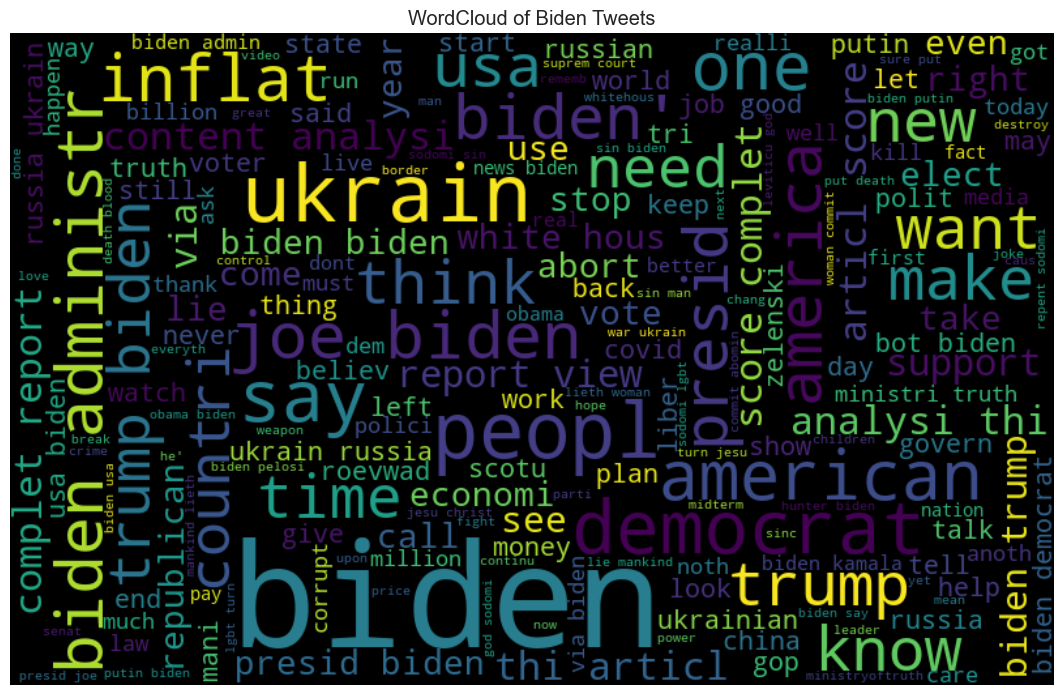

In [162]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Biden Tweets")
plt.show()

# SENTIMENT ANALYSIS

In [163]:
from textblob import TextBlob

In [164]:
!pip3 install textblob

In [165]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)

In [166]:
len(pol)

13525

In [167]:
len(text)

222930

In [168]:
df['Processed_Tweet']

0        [fact, bethsentu, dox, justic, bad, enough, bi...
1        [trump, complain, navi, ship, look, ugli, espe...
2        [rememb, biden, left, afghanistan, isnt, bigge...
3        [biden, ask, 813,000, 000,000, defens, budget,...
4        [last, month, scotu, reject, biden, administra...
                               ...                        
13520    [voldemort, back, post, flag, misinform, biden...
13521    [biden, either, boycott, g20indonesia, mayb, z...
13522    [ex-biden, aid, franci, person, went, white, h...
13523    [biden, compromis, nation, secur, green, light...
13524    [fool, believ, possibl, nuclear, war, ukrainew...
Name: Processed_Tweet, Length: 13525, dtype: object

In [169]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 4616
Negative Tweets: 2620
Neutral Tweets 6289


In [170]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/saikeerthanpalavarapu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [171]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [172]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))

In [173]:
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.315,0.685,0.000,-0.8481
1,0.217,0.783,0.000,-0.3612
2,0.000,1.000,0.000,0.0000
3,0.200,0.800,0.000,-0.5423
4,0.138,0.612,0.250,0.2960
...,...,...,...,...
13520,0.000,0.827,0.173,0.3182
13521,0.253,0.661,0.086,-0.5106
13522,0.100,0.818,0.082,-0.1280
13523,0.000,0.892,0.108,0.4201


In [174]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.315,0.685,0.00,-0.8481,Negative
1,0.217,0.783,0.00,-0.3612,Negative
2,0.000,1.000,0.00,0.0000,Neutral
3,0.200,0.800,0.00,-0.5423,Negative
4,0.138,0.612,0.25,0.2960,Positive


<Axes: xlabel='sentiment', ylabel='count'>

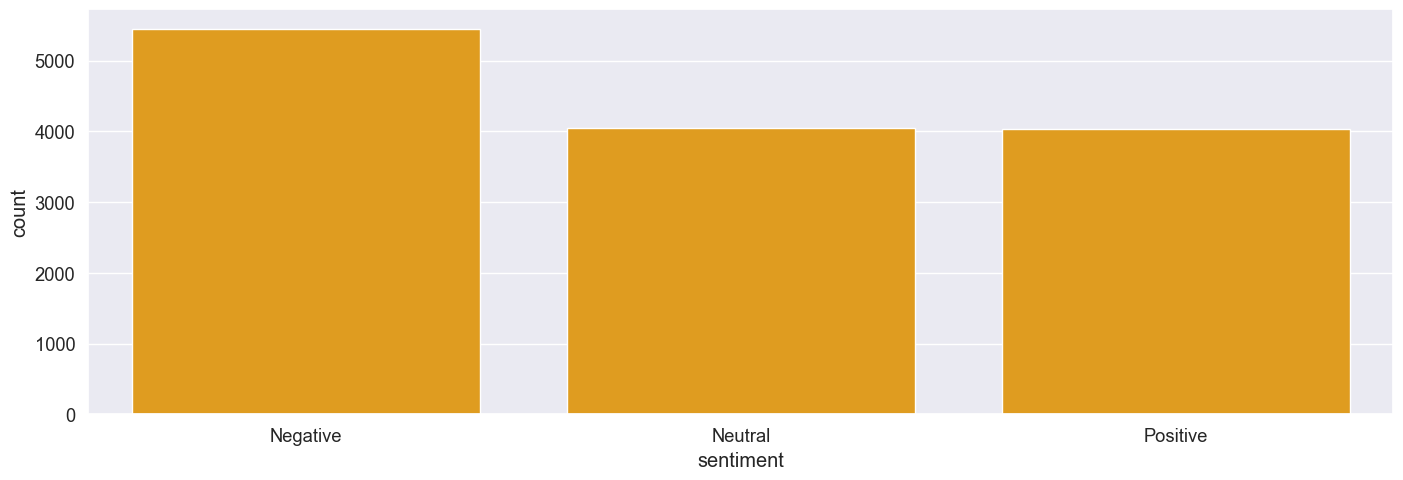

In [175]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count , color = 'orange')

In [176]:
filepath = r"./NRC Emotion Lexicon.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

86343

In [177]:
emolex_df

,word,emotion,association
0,abandonment,joy,0.0
1,abandonment,negative,1.0
2,abandonment,positive,0.0
3,abandonment,sadness,1.0
4,abandonment,surprise,1.0
...,...,...,...
86338,oncologist,disgust,0.0
86339,oncologist,fear,0.0
86340,oncologist,joy,0.0
86341,oncologist,negative,0.0


In [178]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [179]:
word_emotion=dict()
for i in range(0,86343):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association  

In [180]:
for i in range(0,13525):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]
emotions

{'positive': 5395.0,
 'negative': 5899.0,
 'surprise': 1373.0,
 'sadness': 2651.0,
 'anger': 3138.0,
 'joy': 1913.0,
 'trust': 3427.0,
 'fear': 3507.0,
 'anticipation': 2234.0,
 'disgust': 1895.0}

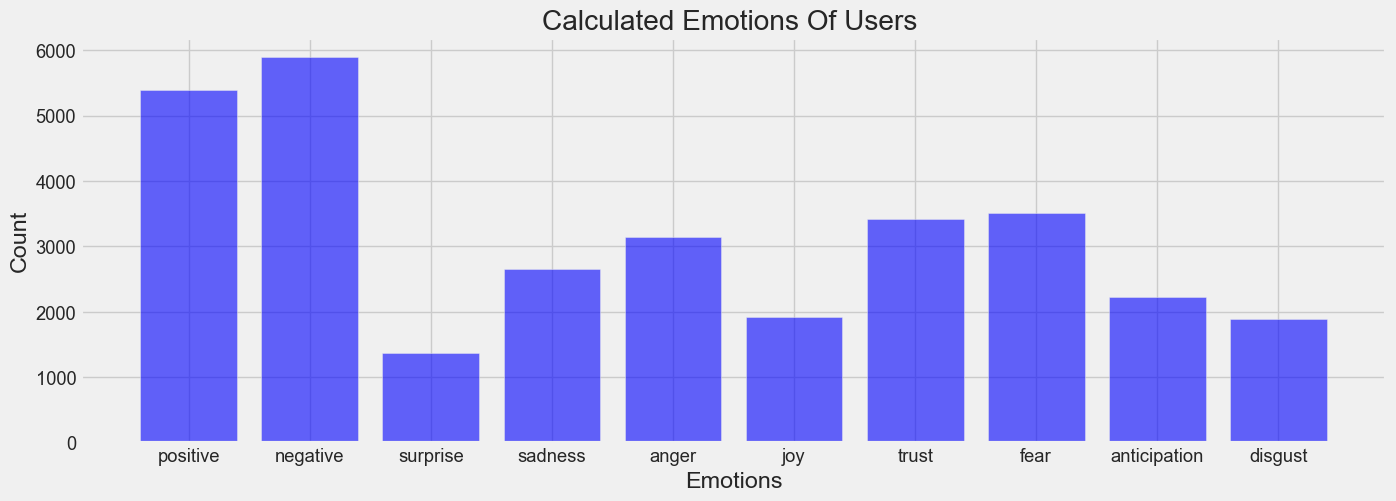

In [181]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='blue',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [182]:
df["Location"]  = df["Location"].fillna('USA')
df["Location"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/770225664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Location"]  = df["Location"].fillna('USA')


0                      USA
1                      USA
2                      USA
3                      USA
4              Kansas, USA
               ...        
13520                  USA
13521         Planet Earth
13522    The Beautiful USA
13523             America 
13524                  USA
Name: Location, Length: 13525, dtype: object

In [183]:
df["Location"] =  df["Location"].apply(lambda x: x.replace('United States','USA'))
df["Location"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/1588729944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Location"] =  df["Location"].apply(lambda x: x.replace('United States','USA'))


0                      USA
1                      USA
2                      USA
3                      USA
4              Kansas, USA
               ...        
13520                  USA
13521         Planet Earth
13522    The Beautiful USA
13523             America 
13524                  USA
Name: Location, Length: 13525, dtype: object

In [184]:
 df["Location"].value_counts()

Location
USA                       5444
Austin, TX                 359
Kuala Lumpur, Malaysia     197
Portugal                   110
Darien, CT, USA            105
                          ... 
NorthWest England            1
Bavaria, Germany             1
Paris, Ile-de-France         1
Greenville, SC               1
America                      1
Name: count, Length: 2485, dtype: int64

In [185]:
locations_s = []
locations_s =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_s
df

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8338/180803770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Location'] = locations_s


,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2022-05-08 23:58:20,1523452270448635905,False,The fact that #BethSentUs doxxed the justices ...,SanFranSooner,USA,Twitter for iPhone,3,285,561,2,"[fact, bethsentu, dox, justic, bad, enough, bi...",USA
1,2022-05-08 23:57:33,1523452076147179520,False,Trump complained US Navy ships ‘look ugly’: Es...,MartinJmcmah,USA,Twitter for iPhone,2,1213,179,0,"[trump, complain, navi, ship, look, ugli, espe...",USA
2,2022-05-08 23:56:51,1523451899659251712,False,Remember when #biden left Afghanistan? Why isn...,christjiminy1,USA,Twitter for iPhone,0,8,67,0,"[rememb, biden, left, afghanistan, isnt, bigge...",USA
3,2022-05-08 23:55:50,1523451642909061121,False,"#Biden is asking for a $813,000,000,000 ""defen...",joshuamills044,USA,Twitter for Android,0,662,1089,0,"[biden, ask, 813,000, 000,000, defens, budget,...",USA
4,2022-05-08 23:53:44,1523451115479924741,False,"@ArseGrammatica Last month, the #SCOTUS reject...",hollmic,"Kansas, USA",Twitter Web App,0,89,427,0,"[last, month, scotu, reject, biden, administra...",Kansas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13520,2022-04-29 22:47:06,1520172853454323712,False,Voldemort is back!\n\n** This post has been fl...,2DIEisGAIN82,USA,Twitter for iPhone,0,75,291,0,"[voldemort, back, post, flag, misinform, biden...",USA
13521,2022-04-29 22:46:23,1520172674709954560,False,#Biden will have to either #boycott #G20Indone...,besthealthyou,Planet Earth,Twitter Web App,0,427,62,0,"[biden, either, boycott, g20indonesia, mayb, z...",Planet Earth
13522,2022-04-29 22:44:43,1520172254700703744,False,Ex-#Biden aide Francis Person went to White Ho...,livlifealliance,The Beautiful USA,Twitter for Android,0,17,140,0,"[ex-biden, aid, franci, person, went, white, h...",The Beautiful USA
13523,2022-04-29 22:44:39,1520172237562728448,False,@GOP:\nDid #Biden compromise national security...,ttstrac,America,Twitter for iPhone,0,5130,5504,0,"[biden, compromis, nation, secur, green, light...",America


In [186]:
df_dup = df.copy()

In [187]:
df_dup['sentiment'] = sentimental_score_df['val']
df_dup.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment
0,2022-05-08 23:58:20,1523452270448635905,False,The fact that #BethSentUs doxxed the justices ...,SanFranSooner,USA,Twitter for iPhone,3,285,561,2,"[fact, bethsentu, dox, justic, bad, enough, bi...",USA,Negative
1,2022-05-08 23:57:33,1523452076147179520,False,Trump complained US Navy ships ‘look ugly’: Es...,MartinJmcmah,USA,Twitter for iPhone,2,1213,179,0,"[trump, complain, navi, ship, look, ugli, espe...",USA,Negative
2,2022-05-08 23:56:51,1523451899659251712,False,Remember when #biden left Afghanistan? Why isn...,christjiminy1,USA,Twitter for iPhone,0,8,67,0,"[rememb, biden, left, afghanistan, isnt, bigge...",USA,Neutral
3,2022-05-08 23:55:50,1523451642909061121,False,"#Biden is asking for a $813,000,000,000 ""defen...",joshuamills044,USA,Twitter for Android,0,662,1089,0,"[biden, ask, 813,000, 000,000, defens, budget,...",USA,Negative
4,2022-05-08 23:53:44,1523451115479924741,False,"@ArseGrammatica Last month, the #SCOTUS reject...",hollmic,"Kansas, USA",Twitter Web App,0,89,427,0,"[last, month, scotu, reject, biden, administra...",Kansas,Positive


In [188]:
df_dup.to_csv('./sentiment_after_Election.csv',index = False)

In [189]:
df_dup['day'] = df_dup.Date.dt.day
df_dup.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2022-05-08 23:58:20,1523452270448635905,False,The fact that #BethSentUs doxxed the justices ...,SanFranSooner,USA,Twitter for iPhone,3,285,561,2,"[fact, bethsentu, dox, justic, bad, enough, bi...",USA,Negative,8
1,2022-05-08 23:57:33,1523452076147179520,False,Trump complained US Navy ships ‘look ugly’: Es...,MartinJmcmah,USA,Twitter for iPhone,2,1213,179,0,"[trump, complain, navi, ship, look, ugli, espe...",USA,Negative,8
2,2022-05-08 23:56:51,1523451899659251712,False,Remember when #biden left Afghanistan? Why isn...,christjiminy1,USA,Twitter for iPhone,0,8,67,0,"[rememb, biden, left, afghanistan, isnt, bigge...",USA,Neutral,8
3,2022-05-08 23:55:50,1523451642909061121,False,"#Biden is asking for a $813,000,000,000 ""defen...",joshuamills044,USA,Twitter for Android,0,662,1089,0,"[biden, ask, 813,000, 000,000, defens, budget,...",USA,Negative,8
4,2022-05-08 23:53:44,1523451115479924741,False,"@ArseGrammatica Last month, the #SCOTUS reject...",hollmic,"Kansas, USA",Twitter Web App,0,89,427,0,"[last, month, scotu, reject, biden, administra...",Kansas,Positive,8


<Axes: xlabel='day', ylabel='count'>

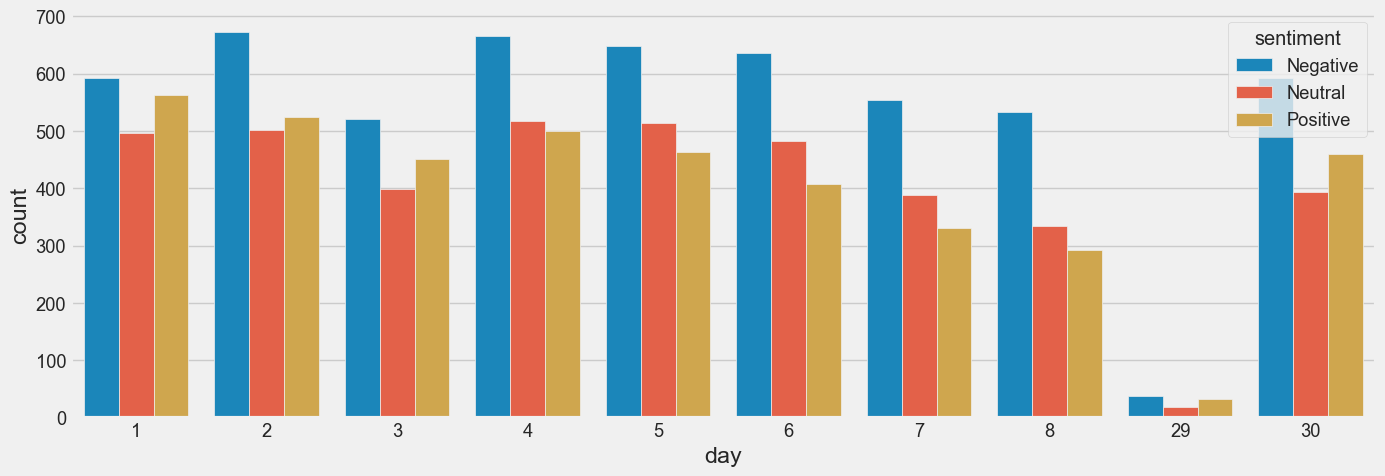

In [190]:
sns.countplot(x='day', hue='sentiment', data=df_dup)

Predictions

In [191]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [192]:
le = LabelEncoder() 
  
df_dup['sentiment_1']= le.fit_transform(df_dup['sentiment']) 
df_dup

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2022-05-08 23:58:20,1523452270448635905,False,The fact that #BethSentUs doxxed the justices ...,SanFranSooner,USA,Twitter for iPhone,3,285,561,2,"[fact, bethsentu, dox, justic, bad, enough, bi...",USA,Negative,8,0
1,2022-05-08 23:57:33,1523452076147179520,False,Trump complained US Navy ships ‘look ugly’: Es...,MartinJmcmah,USA,Twitter for iPhone,2,1213,179,0,"[trump, complain, navi, ship, look, ugli, espe...",USA,Negative,8,0
2,2022-05-08 23:56:51,1523451899659251712,False,Remember when #biden left Afghanistan? Why isn...,christjiminy1,USA,Twitter for iPhone,0,8,67,0,"[rememb, biden, left, afghanistan, isnt, bigge...",USA,Neutral,8,1
3,2022-05-08 23:55:50,1523451642909061121,False,"#Biden is asking for a $813,000,000,000 ""defen...",joshuamills044,USA,Twitter for Android,0,662,1089,0,"[biden, ask, 813,000, 000,000, defens, budget,...",USA,Negative,8,0
4,2022-05-08 23:53:44,1523451115479924741,False,"@ArseGrammatica Last month, the #SCOTUS reject...",hollmic,"Kansas, USA",Twitter Web App,0,89,427,0,"[last, month, scotu, reject, biden, administra...",Kansas,Positive,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13520,2022-04-29 22:47:06,1520172853454323712,False,Voldemort is back!\n\n** This post has been fl...,2DIEisGAIN82,USA,Twitter for iPhone,0,75,291,0,"[voldemort, back, post, flag, misinform, biden...",USA,Positive,29,2
13521,2022-04-29 22:46:23,1520172674709954560,False,#Biden will have to either #boycott #G20Indone...,besthealthyou,Planet Earth,Twitter Web App,0,427,62,0,"[biden, either, boycott, g20indonesia, mayb, z...",Planet Earth,Negative,29,0
13522,2022-04-29 22:44:43,1520172254700703744,False,Ex-#Biden aide Francis Person went to White Ho...,livlifealliance,The Beautiful USA,Twitter for Android,0,17,140,0,"[ex-biden, aid, franci, person, went, white, h...",The Beautiful USA,Negative,29,0
13523,2022-04-29 22:44:39,1520172237562728448,False,@GOP:\nDid #Biden compromise national security...,ttstrac,America,Twitter for iPhone,0,5130,5504,0,"[biden, compromis, nation, secur, green, light...",America,Positive,29,2


In [193]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df_dup['sentiment_1']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


DECISION TREE

In [195]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [196]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.7976835879743717
Precision Score:  0.7976835879743717
Recall Score:  0.7976835879743717
F1 Score:  0.7976835879743717


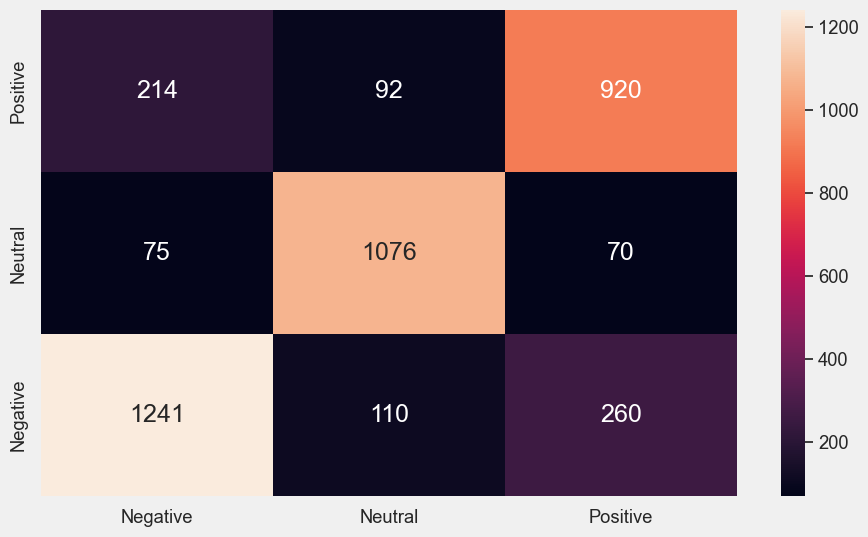

In [197]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

RANDOM FOREST CLASSIFIER

In [198]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [199]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.8477082306554953
Precision Score:  0.8477082306554953
Recall Score:  0.8477082306554953
F1 Score:  0.8477082306554953


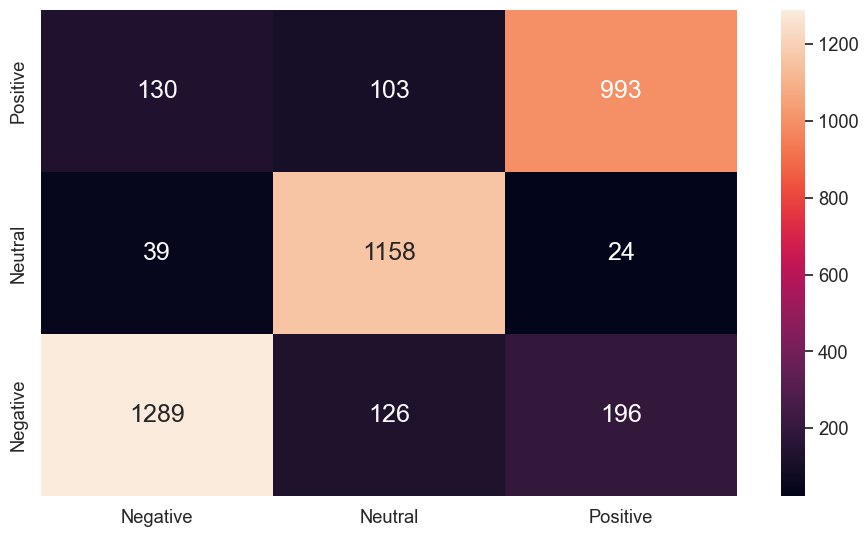

In [200]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

NAIVE BAYES CLASSIFIER

In [201]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

In [202]:
accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.7037949728930508
Precision Score:  0.7037949728930508
Recall Score:  0.7037949728930508
F1 Score:  0.7037949728930508


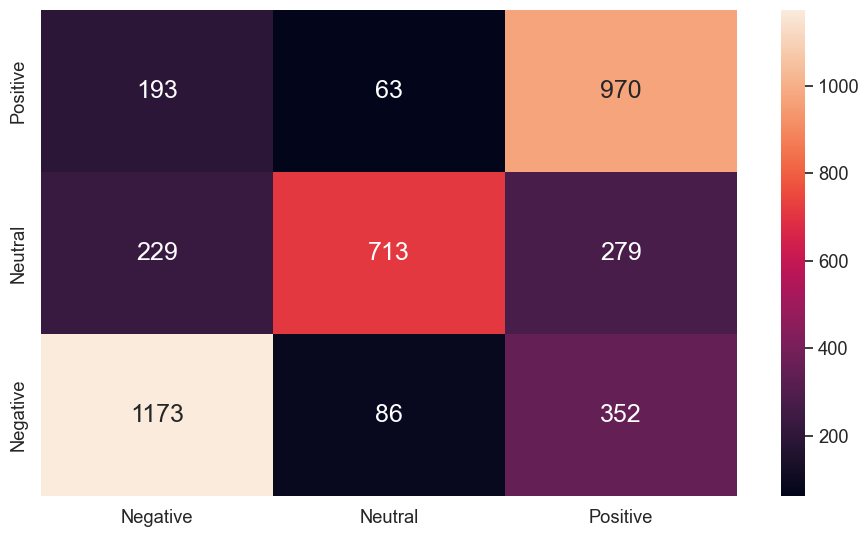

In [203]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

LOGISTIC REGRESSION

In [204]:
classifier_LR = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'auto', penalty = None)
classifier_LR.fit(X_train, y_train)
y_pred_LR = classifier_LR.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
accuracy_score_LR = accuracy_score(y_test, y_pred_LR)
precision_score_LR = precision_score(y_test, y_pred_LR , average = 'micro')
recall_score_LR = recall_score(y_test, y_pred_LR, average = 'micro')
f1_score_LR = f1_score(y_test, y_pred_LR, average = 'micro')
print("Accuracy Score: " , accuracy_score_LR)
print("Precision Score: " , precision_score_LR)
print("Recall Score: " , recall_score_LR)
print("F1 Score: " , f1_score_LR)

Accuracy Score:  0.7934943321833415
Precision Score:  0.7934943321833415
Recall Score:  0.7934943321833415
F1 Score:  0.7934943321833415


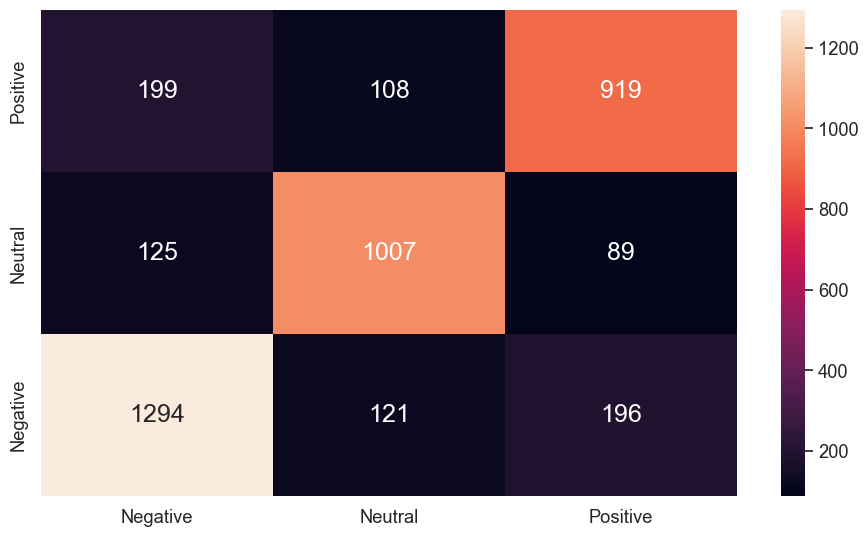

In [206]:
cm_LR = confusion_matrix(y_test, y_pred_LR)

df_cm_LR = pd.DataFrame(cm_LR, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_LR, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

# Comparing the Models

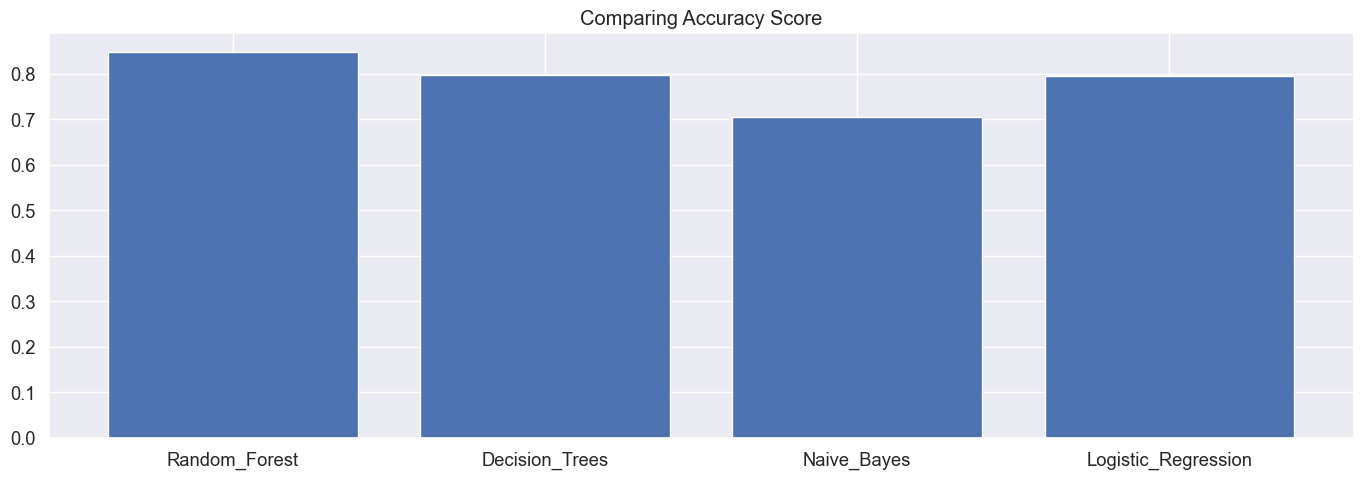

In [207]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_NB, accuracy_score_LR]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes', "Logistic_Regression"]
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

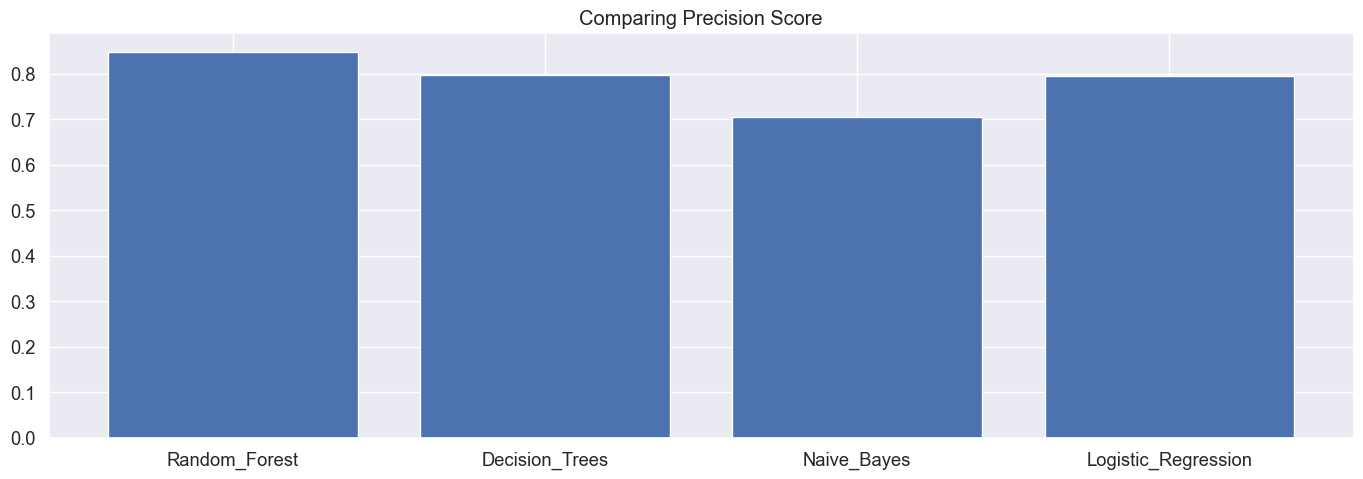

In [208]:
Precision = [precision_score_RF, precision_score_DT, precision_score_NB, precision_score_LR]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes', 'Logistic_Regression']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

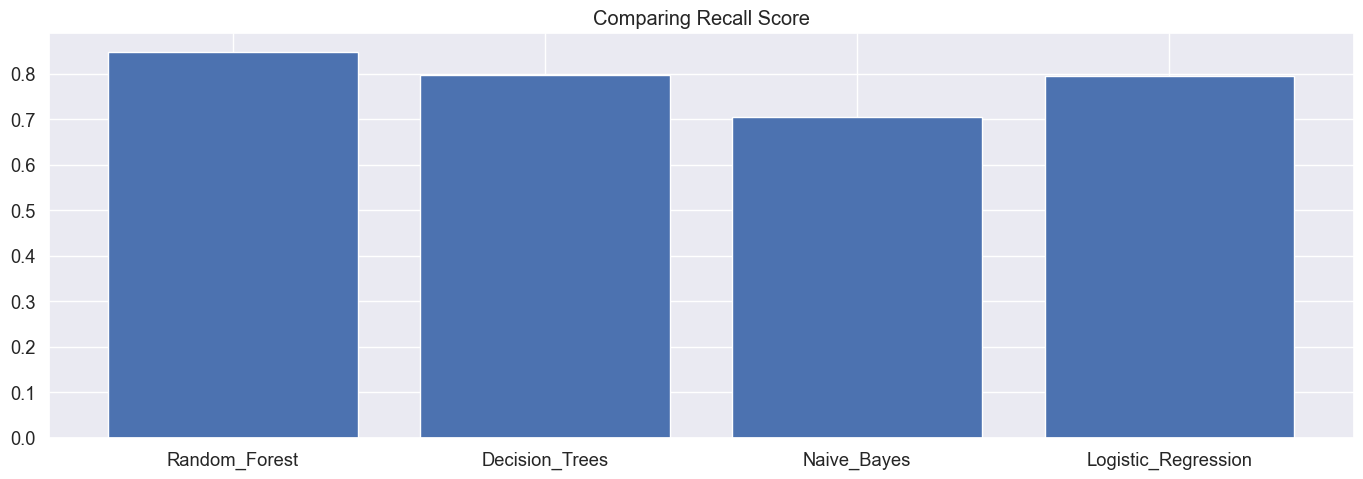

In [209]:
Recall = [recall_score_RF, recall_score_DT, recall_score_NB, recall_score_LR]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes', 'Logistic_Regression']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

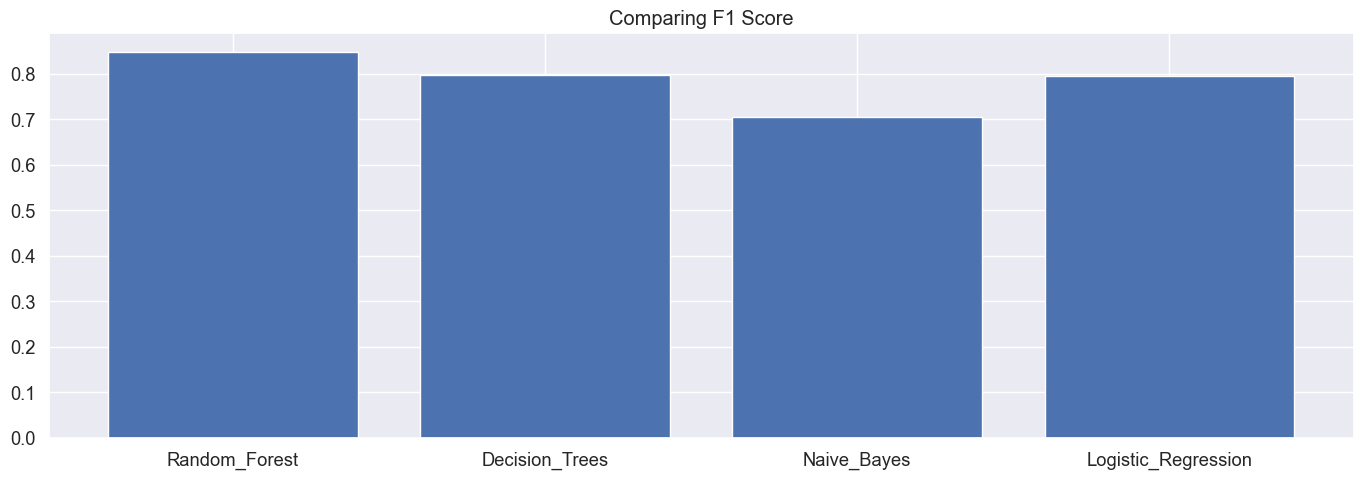

In [210]:
F1 = [f1_score_RF,f1_score_DT,f1_score_NB, f1_score_LR]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes', 'Logistic_Regression']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()